In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [2]:

diabetes_dataset = pd.read_csv("D:\downloads\diabetes.csv") 

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kanav\AppData\Local\Temp\ipykernel_14720\3024396913.py:1: SyntaxWarning: invalid escape sequence '\d'
  diabetes_dataset = pd.read_csv("D:\downloads\diabetes.csv")


In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.shape


(768, 9)

In [5]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [6]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [7]:
'''scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)'''

'scaler = StandardScaler()\nscaler.fit(X)\nstandardized_data = scaler.transform(X)\nprint(standardized_data)'

In [8]:
'''X = standardized_data
Y = diabetes_dataset['Outcome']
print(X)
print(Y)'''

"X = standardized_data\nY = diabetes_dataset['Outcome']\nprint(X)\nprint(Y)"

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [10]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

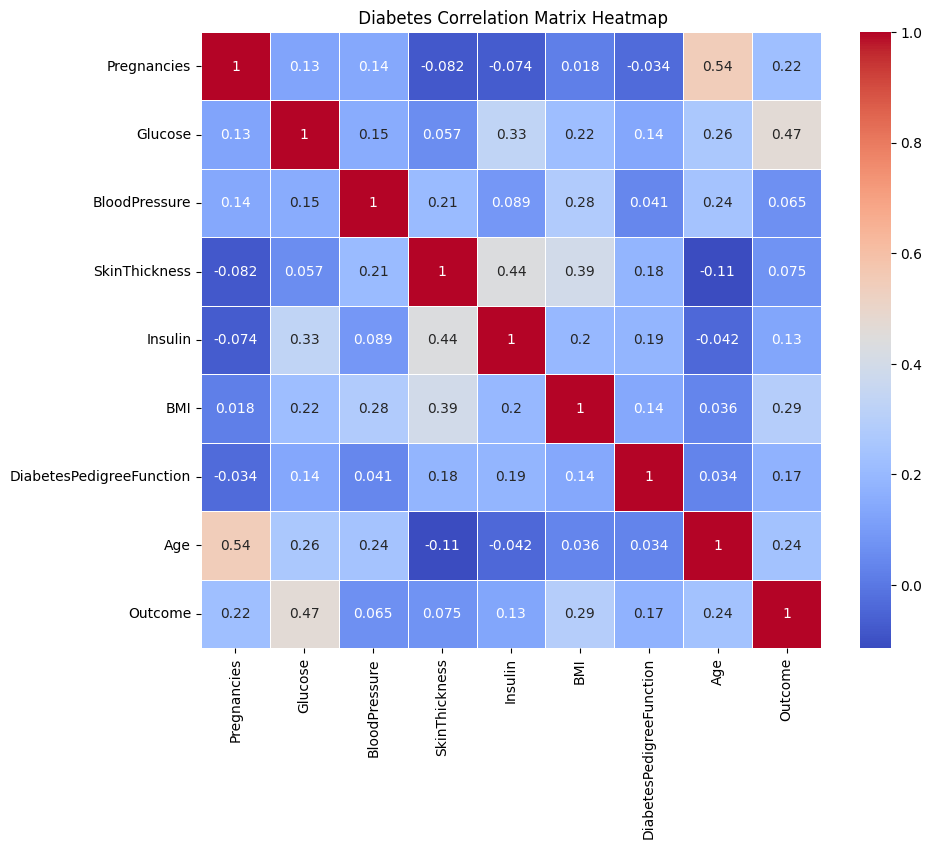

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = diabetes_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(' Diabetes Correlation Matrix Heatmap')
plt.show()

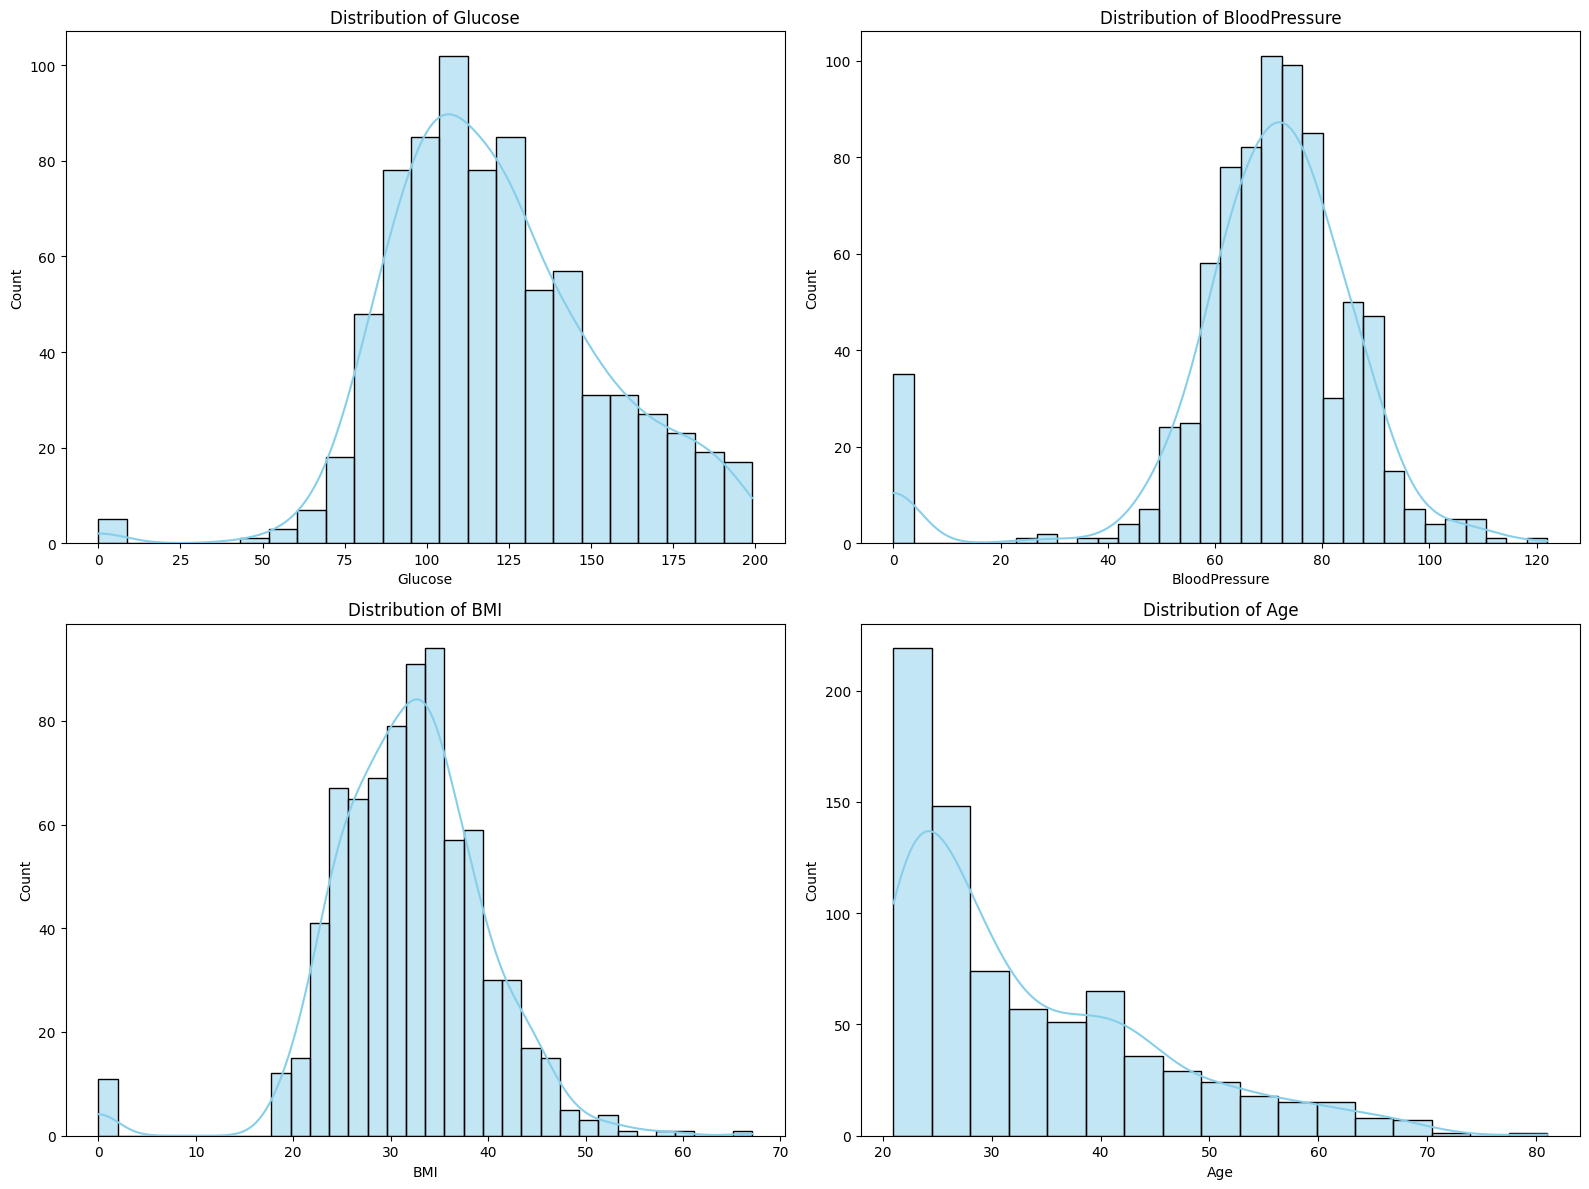

In [29]:
features = ['Glucose', 'BloodPressure', 'BMI', 'Age']


plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=diabetes_dataset, x=feature, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

C:\Users\kanav\AppData\Local\Temp\ipykernel_14720\1818636500.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=diabetes_dataset, palette='Set2')
C:\Users\kanav\AppData\Local\Temp\ipykernel_14720\1818636500.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=diabetes_dataset, palette='Set2')
C:\Users\kanav\AppData\Local\Temp\ipykernel_14720\1818636500.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=diabetes_dataset, palette='Set2')
C:\Users\kanav\AppD

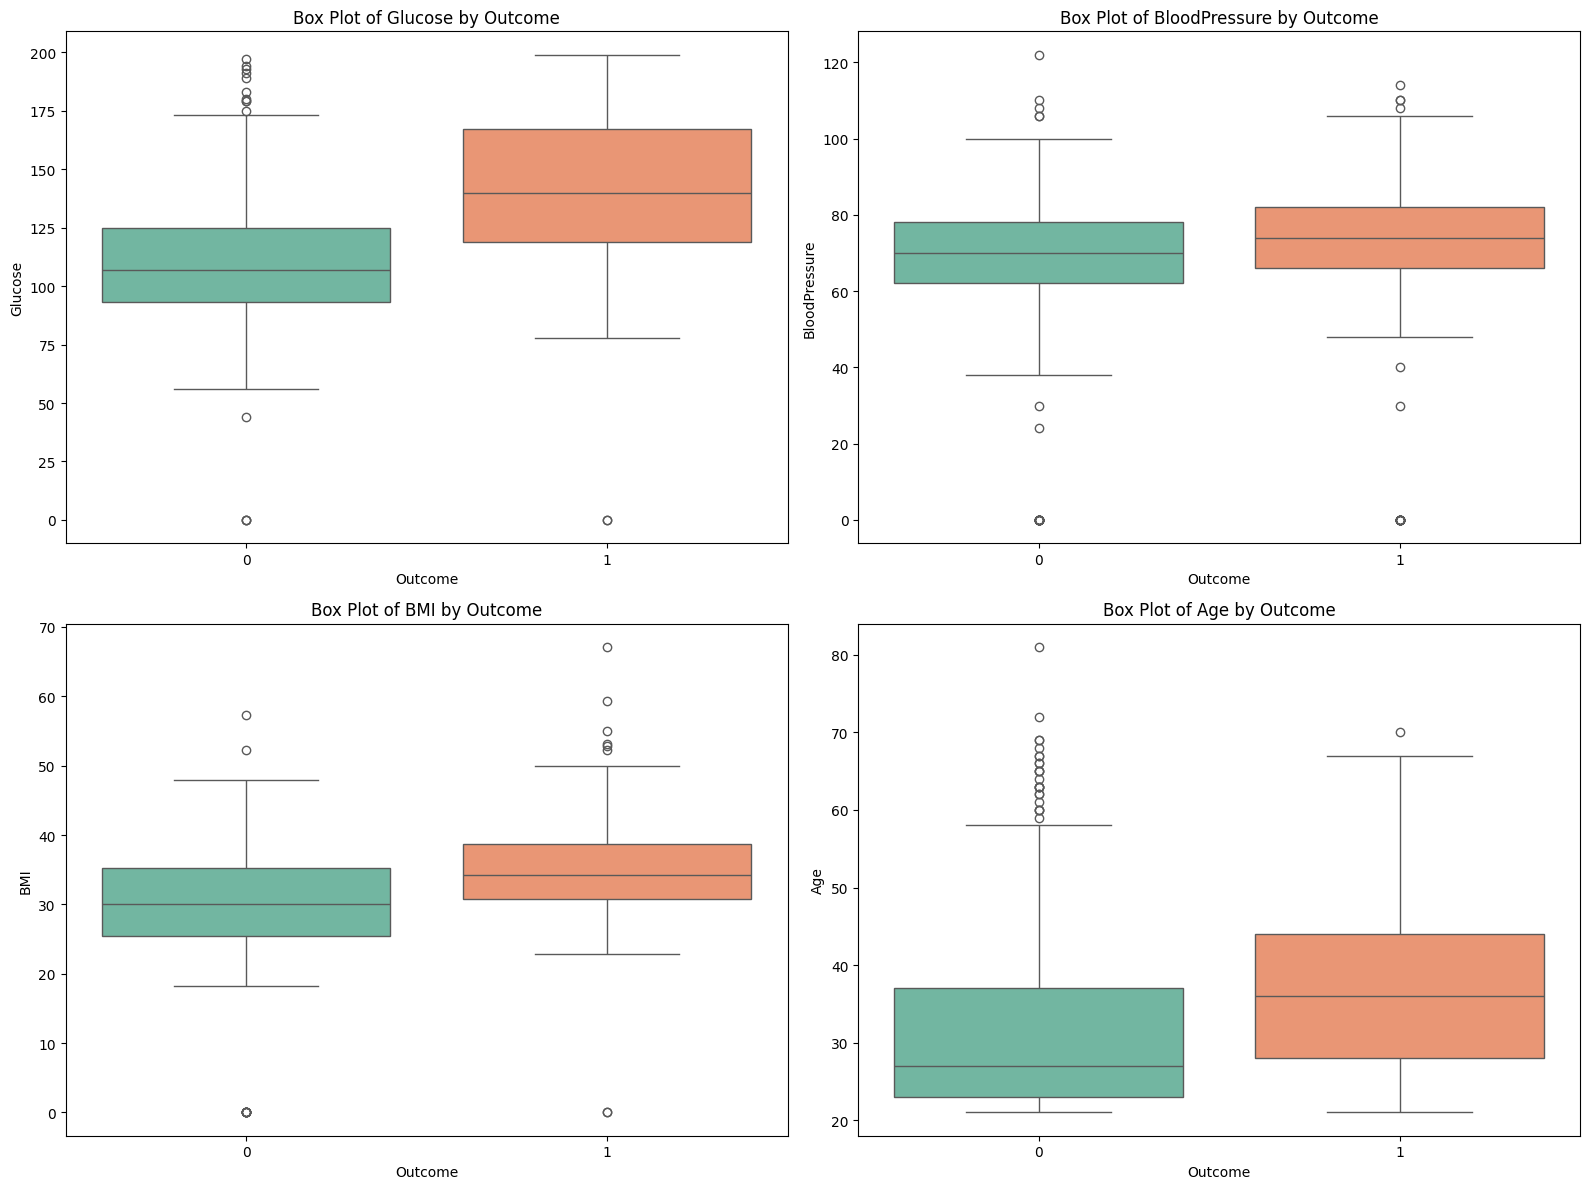

In [30]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Outcome', y=feature, data=diabetes_dataset, palette='Set2')
    plt.title(f'Box Plot of {feature} by Outcome')
plt.tight_layout()
plt.show()

AttributeError: PolyCollection.set() got an unexpected keyword argument 'bins'

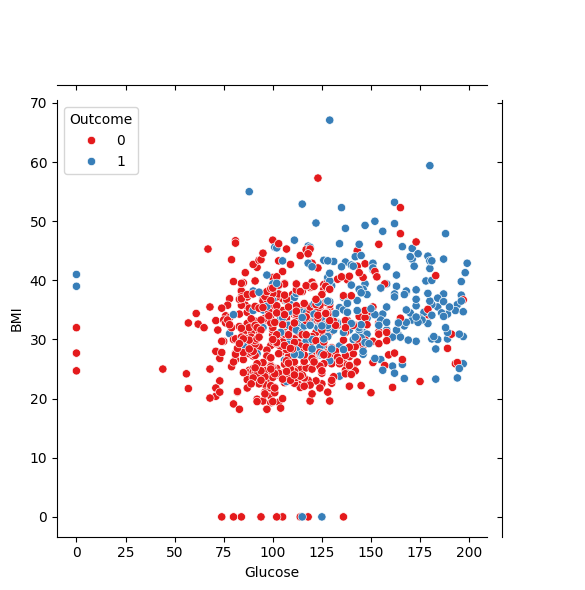

In [33]:
sns.jointplot(data=diabetes_dataset, x='Glucose', y='BMI', hue='Outcome', kind='scatter', palette='Set1', marginal_kws=dict(bins=30, fill=True))

# Add titles and labels
plt.suptitle('Joint Plot of Glucose vs. BMI', y=1.02)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

In [12]:
diabetes_dataset.shape

(768, 9)

In [13]:
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

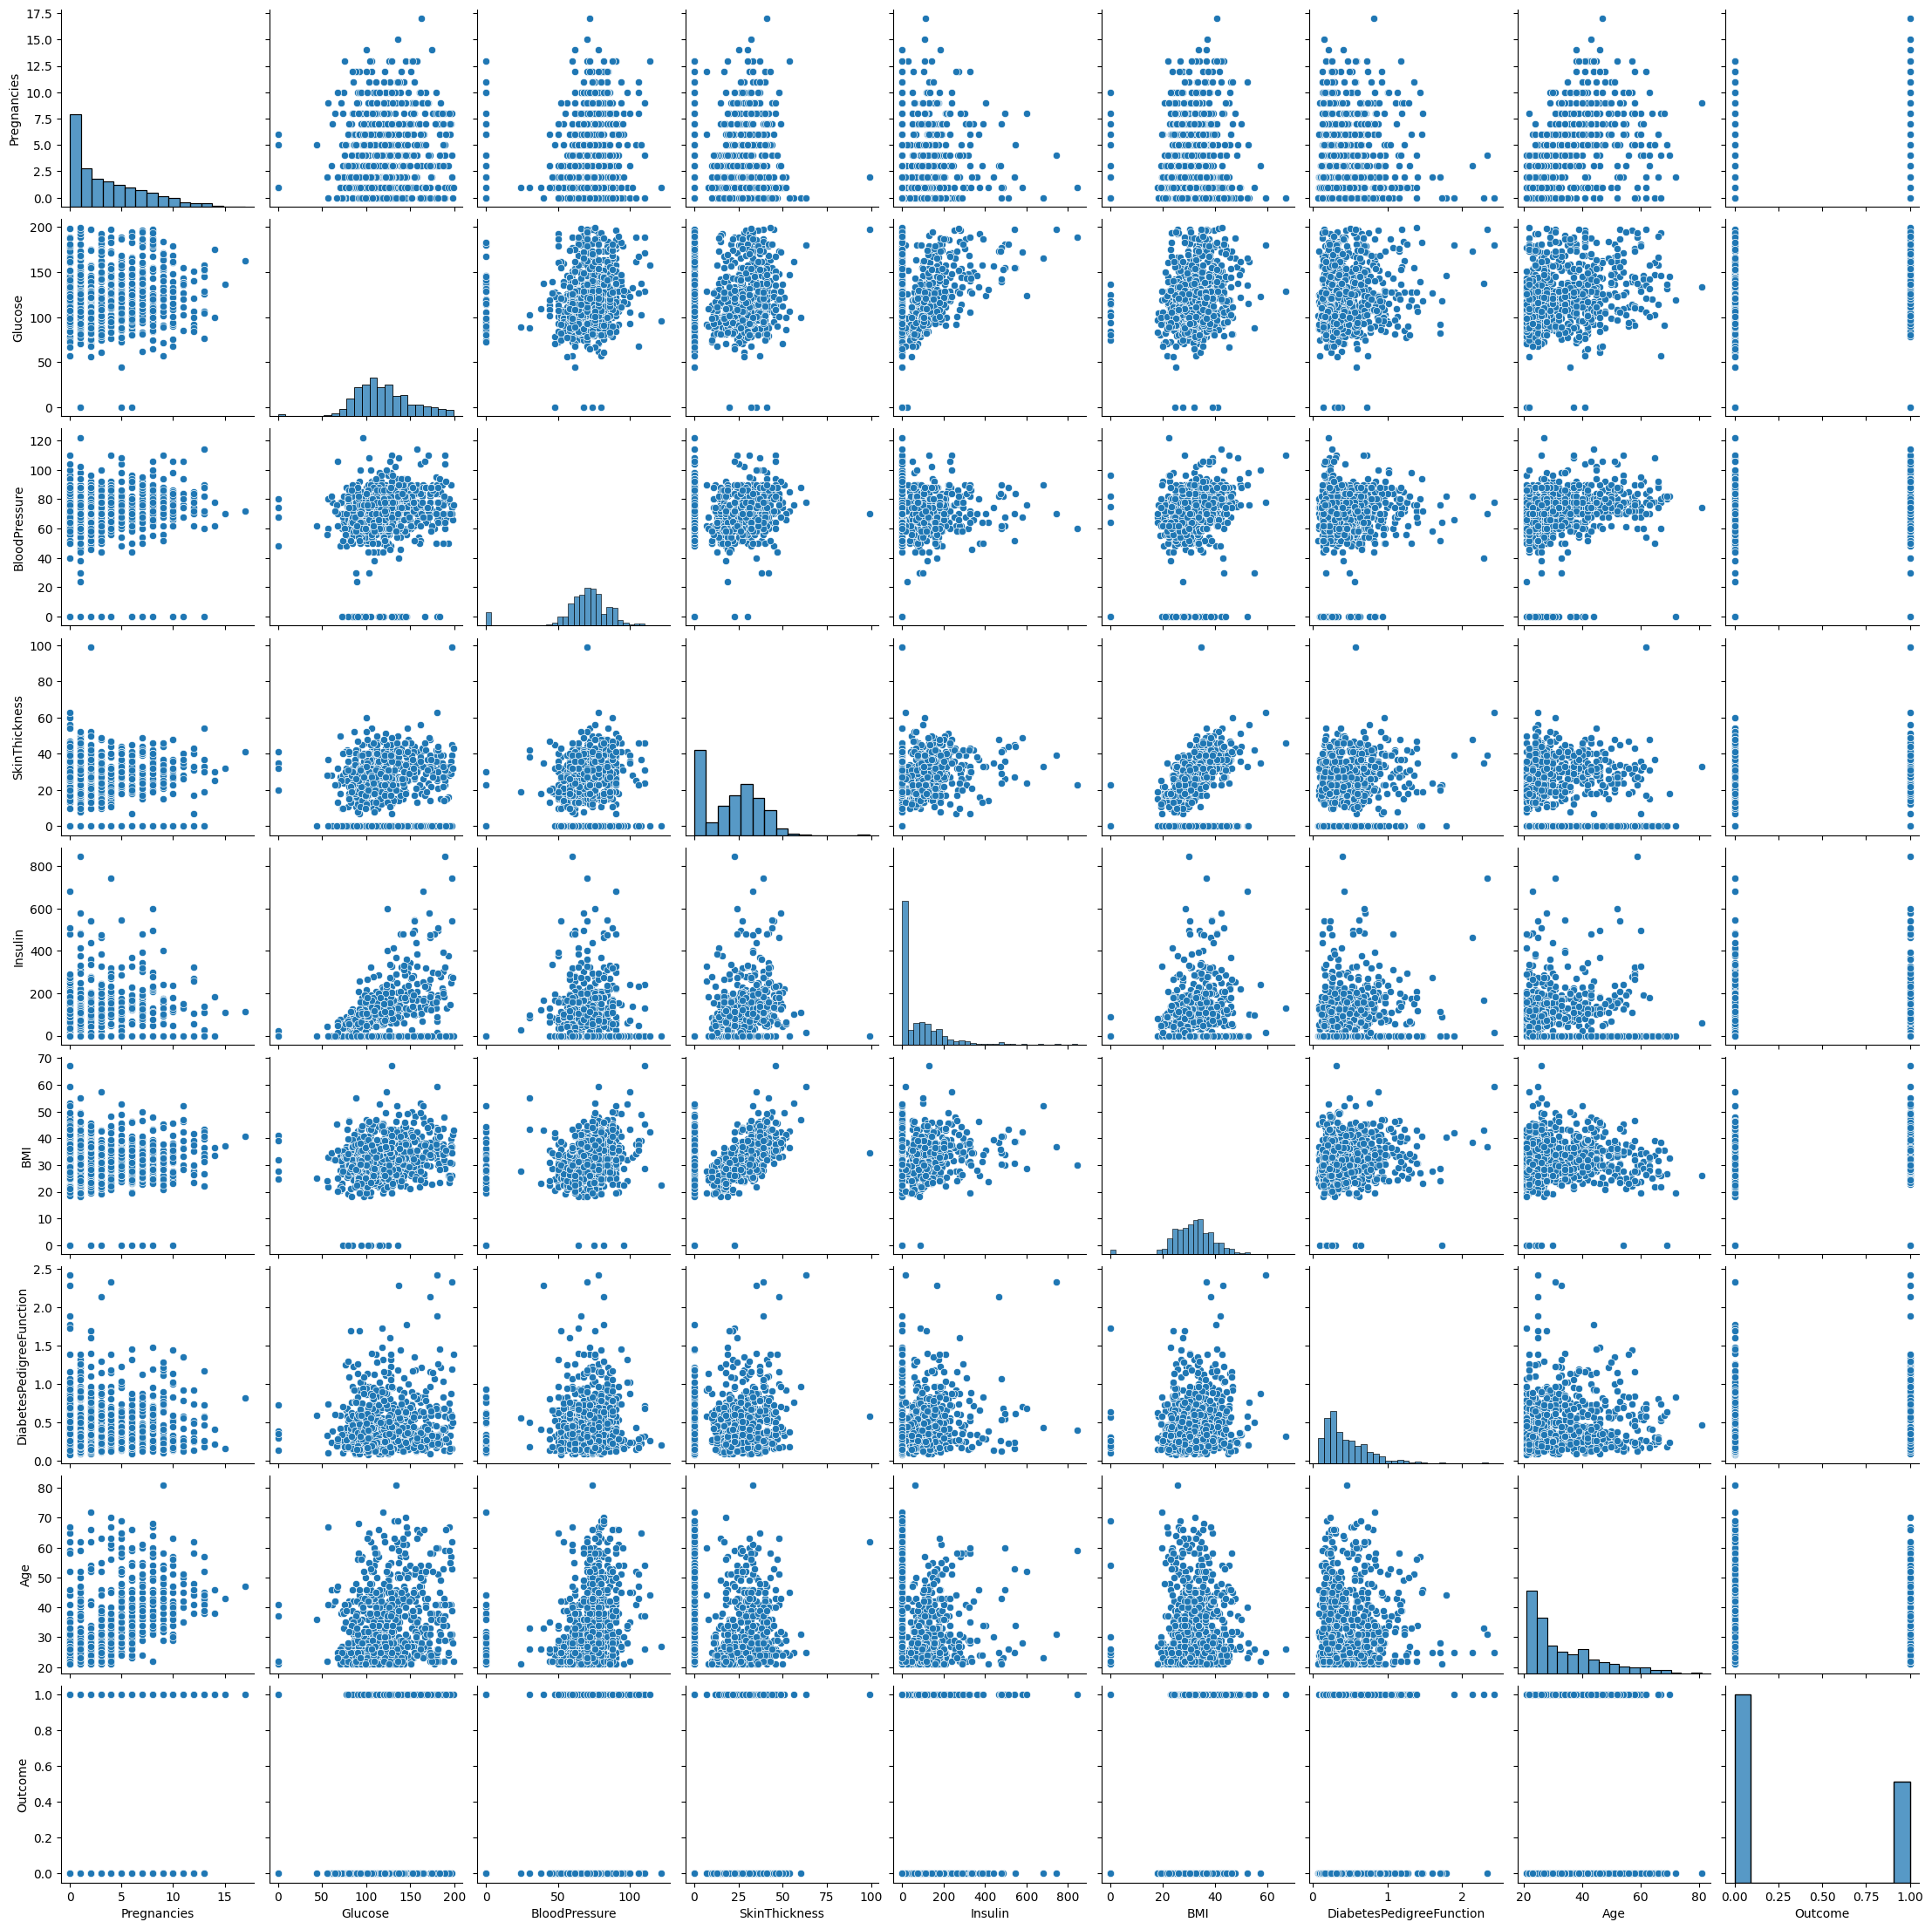

In [14]:
sns.pairplot(diabetes_dataset)

The pair plot shows relationships between multiple features in the dataset. The 'Outcome' variable appears to have visible clustering with features such as 'Glucose', 'BMI', and 'Age', suggesting these features might be significant in predicting the 'Outcome'.

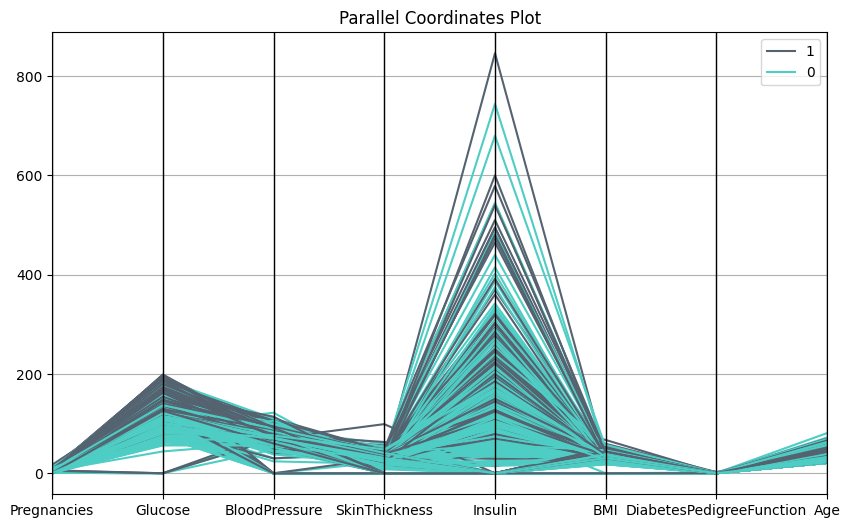

In [15]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10, 6))
parallel_coordinates(diabetes_dataset,'Outcome', color=['#556270', '#4ECDC4', '#C7F464'])
plt.title('Parallel Coordinates Plot')
plt.show()

The parallel coordinates plot indicates that there are distinct patterns in the 'Glucose' and 'BMI' features between patients with different 'Outcome' values. Patients with an outcome of 1 (diabetes) generally have higher glucose levels compared to those with an outcome of 0 (no diabetes). Additionally, the 'Insulin' levels show significant variance, but it doesn't clearly differentiate between the outcomes. Other features like 'Pregnancies', 'BloodPressure', and 'Age' show overlapping distributions with some variance.

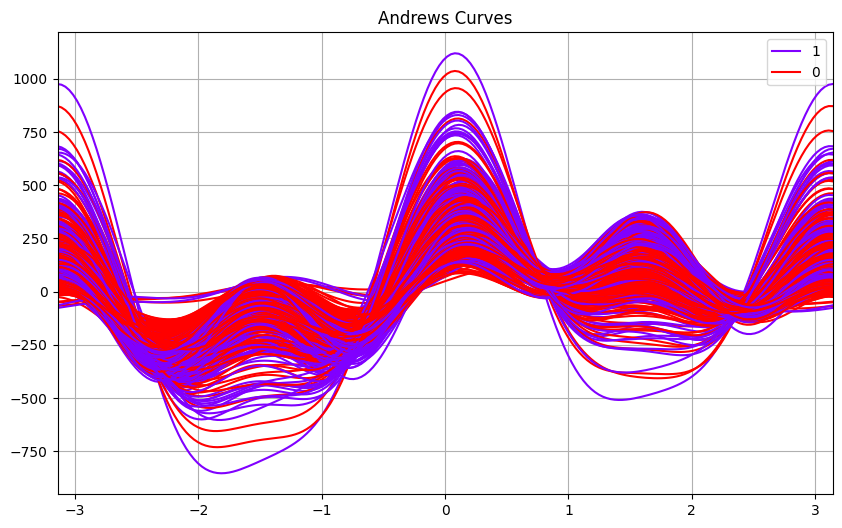

In [16]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(10, 6))
andrews_curves( diabetes_dataset , 'Outcome', colormap='rainbow')
plt.title('Andrews Curves')
plt.show()

In [17]:
classifier = svm.SVC(kernel='linear')

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, Y_train)



RandomForestClassifier(random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [20]:
X_train_prediction_svm = classifier.predict(X_train)
training_data_accuracy_SVM = accuracy_score(X_train_prediction_svm, Y_train)
X_train_prediction_randforest = rf_model.predict(X_train)
training_data_accuracy_Linearregression = accuracy_score(X_train_prediction_randforest , Y_train)
X_train_prediction_LR = lr_model.predict(X_train)
training_data_accuracy_LR = accuracy_score(X_train_prediction_LR, Y_train)
print('Accuracy score of the training data_SVM : ', training_data_accuracy_SVM)
print('Accuracy score of the training data_randomForest : ', training_data_accuracy_Linearregression)
print('Accuracy score of the training data_LogivalRegression : ', training_data_accuracy_LR)

Accuracy score of the training data_SVM :  0.7833876221498371
Accuracy score of the training data_randomForest :  1.0
Accuracy score of the training data_LogivalRegression :  0.7882736156351792


In [21]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy1 = accuracy_score(X_test_prediction, Y_test)
X_test_prediction2 = rf_model.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction2, Y_test)
X_test_prediction3 = lr_model.predict(X_test)
test_data_accuracy3 = accuracy_score(X_test_prediction3, Y_test)
print('Accuracy score of the test data1_SVM : ', test_data_accuracy1)
print('Accuracy score of the test data2_randforest : ', test_data_accuracy2)
print('Accuracy score of the test data3_LogicalRegression : ', test_data_accuracy3)

Accuracy score of the test data1_SVM :  0.7727272727272727
Accuracy score of the test data2_randforest :  0.7532467532467533
Accuracy score of the test data3_LogicalRegression :  0.7597402597402597


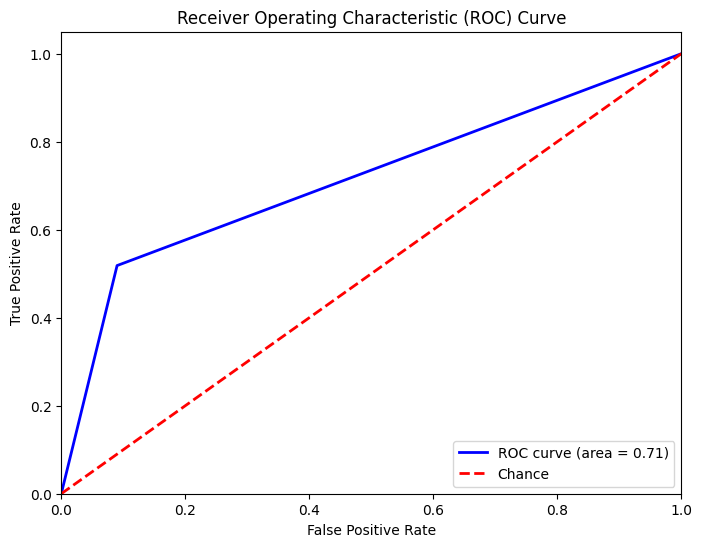

In [31]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, X_test_prediction)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [22]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


c:\Users\kanav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [23]:
import pickle
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename,'wb'))

In [24]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [25]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


c:\Users\kanav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
